iris3.csv 파일을이용하여
1. train, test으로 나누어보세요 (test = 20%).
2. 딥러닝 모델을 업데이트 하시고, 베스트 모델을 만들어 보세요.
   (Q0814_iris.hdf5)
3. 그래프로 확인해 보세요.
4. 학습 자동 중단을 설정해 보세요.
5. [5.3, 2.4, 1, 1.3], [7,2.8,5.6,2] 아이리스의 품종을 예측해 보세요

In [1]:
import pandas as pd
df = pd.read_csv('../../../../data/python_data/iris3.csv')
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
# 속성을 X, 클래스를 y로 저장합니다.
X = df.iloc[:,0:4]
y = df.iloc[:,4]
 
print(X[0:5])
print(y[0:5])

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object


In [3]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [4]:
# 원-핫 인코딩 처리를 합니다.
y = pd.get_dummies(y)

# 원-핫 인코딩 결과를 확인합니다.
print(y[0:5])

   Iris-setosa  Iris-versicolor  Iris-virginica
0            1                0               0
1            1                0               0
2            1                0               0
3            1                0               0
4            1                0               0


In [5]:
#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 설정
model = Sequential()
# 속성값이 4개, 입력이 12개
model.add(Dense(12,  input_dim=4, activation='relu'))
model.add(Dense(8,  activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()


#모델을 컴파일합니다.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=50, batch_size=500) # 0.8 x 0.25 = 0.2

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                60        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 191 (764.00 Byte)
Trainable params: 191 (764.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
1/1 [==============================] - 1s 840ms/step - loss: 1.0324 - accuracy: 0.3750
Epoch 2/50
1/1 [==============================] - 0s 10ms/step - loss: 1.0261 - accuracy: 0.3750
Epoch 3/50
1/1 [==============================] - 0s 11ms/step - loss: 1.0200 - accurac

In [6]:
# 모델 저장의 조건을 설정합니다.
# 50번째 에포크의 검증셋 정확도가 0.9346 => 50-0.9346.hdf5
# 모델명으로 몇번째 에포크의 정확도가 얼마다..를 확인함
modelpath="./model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

# 모델을 실행합니다. 
history=model.fit(X_train, y_train, epochs=1000, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpointer])


Epoch 1: saving model to ./model/all\01-0.7667.hdf5

Epoch 2: saving model to ./model/all\02-0.7667.hdf5

Epoch 3: saving model to ./model/all\03-0.7667.hdf5

Epoch 4: saving model to ./model/all\04-0.7667.hdf5


C:\Users\Playdata\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 5: saving model to ./model/all\05-0.7667.hdf5

Epoch 6: saving model to ./model/all\06-0.7667.hdf5

Epoch 7: saving model to ./model/all\07-0.7667.hdf5

Epoch 8: saving model to ./model/all\08-0.7667.hdf5

Epoch 9: saving model to ./model/all\09-0.7667.hdf5

Epoch 10: saving model to ./model/all\10-0.7667.hdf5

Epoch 11: saving model to ./model/all\11-0.7667.hdf5

Epoch 12: saving model to ./model/all\12-0.7667.hdf5

Epoch 13: saving model to ./model/all\13-0.7667.hdf5

Epoch 14: saving model to ./model/all\14-0.7667.hdf5

Epoch 15: saving model to ./model/all\15-0.7667.hdf5

Epoch 16: saving model to ./model/all\16-0.7667.hdf5

Epoch 17: saving model to ./model/all\17-0.7667.hdf5

Epoch 18: saving model to ./model/all\18-0.7667.hdf5

Epoch 19: saving model to ./model/all\19-0.7667.hdf5

Epoch 20: saving model to ./model/all\20-0.7667.hdf5

Epoch 21: saving model to ./model/all\21-0.7667.hdf5

Epoch 22: saving model to ./model/all\22-0.7667.hdf5

Epoch 23: saving model to ./mode


Epoch 155: saving model to ./model/all\155-0.9667.hdf5

Epoch 156: saving model to ./model/all\156-0.9667.hdf5

Epoch 157: saving model to ./model/all\157-0.9667.hdf5

Epoch 158: saving model to ./model/all\158-0.9667.hdf5

Epoch 159: saving model to ./model/all\159-0.9667.hdf5

Epoch 160: saving model to ./model/all\160-0.9667.hdf5

Epoch 161: saving model to ./model/all\161-0.9667.hdf5

Epoch 162: saving model to ./model/all\162-0.9667.hdf5

Epoch 163: saving model to ./model/all\163-0.9667.hdf5

Epoch 164: saving model to ./model/all\164-0.9667.hdf5

Epoch 165: saving model to ./model/all\165-0.9667.hdf5

Epoch 166: saving model to ./model/all\166-0.9667.hdf5

Epoch 167: saving model to ./model/all\167-0.9667.hdf5

Epoch 168: saving model to ./model/all\168-0.9667.hdf5

Epoch 169: saving model to ./model/all\169-0.9667.hdf5

Epoch 170: saving model to ./model/all\170-0.9667.hdf5

Epoch 171: saving model to ./model/all\171-0.9667.hdf5

Epoch 172: saving model to ./model/all\172-0.96


Epoch 302: saving model to ./model/all\302-1.0000.hdf5

Epoch 303: saving model to ./model/all\303-1.0000.hdf5

Epoch 304: saving model to ./model/all\304-1.0000.hdf5

Epoch 305: saving model to ./model/all\305-1.0000.hdf5

Epoch 306: saving model to ./model/all\306-1.0000.hdf5

Epoch 307: saving model to ./model/all\307-1.0000.hdf5

Epoch 308: saving model to ./model/all\308-1.0000.hdf5

Epoch 309: saving model to ./model/all\309-1.0000.hdf5

Epoch 310: saving model to ./model/all\310-1.0000.hdf5

Epoch 311: saving model to ./model/all\311-1.0000.hdf5

Epoch 312: saving model to ./model/all\312-1.0000.hdf5

Epoch 313: saving model to ./model/all\313-1.0000.hdf5

Epoch 314: saving model to ./model/all\314-1.0000.hdf5

Epoch 315: saving model to ./model/all\315-1.0000.hdf5

Epoch 316: saving model to ./model/all\316-1.0000.hdf5

Epoch 317: saving model to ./model/all\317-1.0000.hdf5

Epoch 318: saving model to ./model/all\318-1.0000.hdf5

Epoch 319: saving model to ./model/all\319-1.00


Epoch 449: saving model to ./model/all\449-1.0000.hdf5

Epoch 450: saving model to ./model/all\450-1.0000.hdf5

Epoch 451: saving model to ./model/all\451-1.0000.hdf5

Epoch 452: saving model to ./model/all\452-1.0000.hdf5

Epoch 453: saving model to ./model/all\453-1.0000.hdf5

Epoch 454: saving model to ./model/all\454-1.0000.hdf5

Epoch 455: saving model to ./model/all\455-1.0000.hdf5

Epoch 456: saving model to ./model/all\456-1.0000.hdf5

Epoch 457: saving model to ./model/all\457-1.0000.hdf5

Epoch 458: saving model to ./model/all\458-1.0000.hdf5

Epoch 459: saving model to ./model/all\459-1.0000.hdf5

Epoch 460: saving model to ./model/all\460-1.0000.hdf5

Epoch 461: saving model to ./model/all\461-1.0000.hdf5

Epoch 462: saving model to ./model/all\462-1.0000.hdf5

Epoch 463: saving model to ./model/all\463-1.0000.hdf5

Epoch 464: saving model to ./model/all\464-1.0000.hdf5

Epoch 465: saving model to ./model/all\465-1.0000.hdf5

Epoch 466: saving model to ./model/all\466-1.00


Epoch 596: saving model to ./model/all\596-1.0000.hdf5

Epoch 597: saving model to ./model/all\597-1.0000.hdf5

Epoch 598: saving model to ./model/all\598-1.0000.hdf5

Epoch 599: saving model to ./model/all\599-1.0000.hdf5

Epoch 600: saving model to ./model/all\600-1.0000.hdf5

Epoch 601: saving model to ./model/all\601-1.0000.hdf5

Epoch 602: saving model to ./model/all\602-1.0000.hdf5

Epoch 603: saving model to ./model/all\603-1.0000.hdf5

Epoch 604: saving model to ./model/all\604-1.0000.hdf5

Epoch 605: saving model to ./model/all\605-1.0000.hdf5

Epoch 606: saving model to ./model/all\606-1.0000.hdf5

Epoch 607: saving model to ./model/all\607-1.0000.hdf5

Epoch 608: saving model to ./model/all\608-1.0000.hdf5

Epoch 609: saving model to ./model/all\609-1.0000.hdf5

Epoch 610: saving model to ./model/all\610-1.0000.hdf5

Epoch 611: saving model to ./model/all\611-1.0000.hdf5

Epoch 612: saving model to ./model/all\612-1.0000.hdf5

Epoch 613: saving model to ./model/all\613-1.00


Epoch 743: saving model to ./model/all\743-1.0000.hdf5

Epoch 744: saving model to ./model/all\744-1.0000.hdf5

Epoch 745: saving model to ./model/all\745-1.0000.hdf5

Epoch 746: saving model to ./model/all\746-1.0000.hdf5

Epoch 747: saving model to ./model/all\747-1.0000.hdf5

Epoch 748: saving model to ./model/all\748-1.0000.hdf5

Epoch 749: saving model to ./model/all\749-1.0000.hdf5

Epoch 750: saving model to ./model/all\750-1.0000.hdf5

Epoch 751: saving model to ./model/all\751-1.0000.hdf5

Epoch 752: saving model to ./model/all\752-1.0000.hdf5

Epoch 753: saving model to ./model/all\753-1.0000.hdf5

Epoch 754: saving model to ./model/all\754-1.0000.hdf5

Epoch 755: saving model to ./model/all\755-1.0000.hdf5

Epoch 756: saving model to ./model/all\756-1.0000.hdf5

Epoch 757: saving model to ./model/all\757-1.0000.hdf5

Epoch 758: saving model to ./model/all\758-1.0000.hdf5

Epoch 759: saving model to ./model/all\759-1.0000.hdf5

Epoch 760: saving model to ./model/all\760-1.00


Epoch 890: saving model to ./model/all\890-1.0000.hdf5

Epoch 891: saving model to ./model/all\891-1.0000.hdf5

Epoch 892: saving model to ./model/all\892-1.0000.hdf5

Epoch 893: saving model to ./model/all\893-1.0000.hdf5

Epoch 894: saving model to ./model/all\894-1.0000.hdf5

Epoch 895: saving model to ./model/all\895-1.0000.hdf5

Epoch 896: saving model to ./model/all\896-1.0000.hdf5

Epoch 897: saving model to ./model/all\897-1.0000.hdf5

Epoch 898: saving model to ./model/all\898-1.0000.hdf5

Epoch 899: saving model to ./model/all\899-1.0000.hdf5

Epoch 900: saving model to ./model/all\900-1.0000.hdf5

Epoch 901: saving model to ./model/all\901-1.0000.hdf5

Epoch 902: saving model to ./model/all\902-1.0000.hdf5

Epoch 903: saving model to ./model/all\903-1.0000.hdf5

Epoch 904: saving model to ./model/all\904-1.0000.hdf5

Epoch 905: saving model to ./model/all\905-1.0000.hdf5

Epoch 906: saving model to ./model/all\906-1.0000.hdf5

Epoch 907: saving model to ./model/all\907-1.00

In [7]:
hist_df=pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.826080,0.677778,0.734855,0.766667
1,0.821842,0.677778,0.730887,0.766667
2,0.817604,0.677778,0.726961,0.766667
3,0.813358,0.677778,0.723074,0.766667
4,0.809108,0.677778,0.719220,0.766667
...,...,...,...,...
995,0.063051,0.977778,0.045381,1.000000
996,0.063017,0.977778,0.045355,1.000000
997,0.062982,0.977778,0.045330,1.000000
998,0.062948,0.977778,0.045306,1.000000


In [8]:
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

1/1 [==============================] - 0s 26ms/step - loss: 0.0471 - accuracy: 1.0000
Test accuracy: 1.0


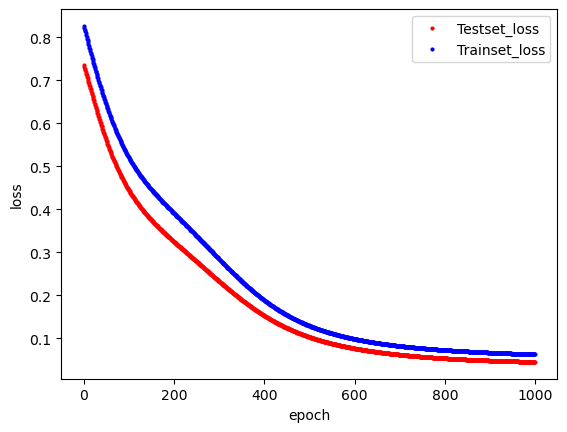

In [9]:
import numpy as np
import matplotlib.pyplot as plt
# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장합니다.
y_vloss=hist_df['val_loss']

# y_loss에 학습셋의 오차를 저장합니다.
y_loss=hist_df['loss']

# x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [10]:
# 학습이 언제 자동 중단 될지를 설정합니다.
# 더이상 좋아지지 않는 20번째 모델을 저장하겠음
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

#최적화 모델이 저장될 폴더와 모델의 이름을 정합니다.
modelpath="./model/best1/Ch14-4-bestmodel.hdf5"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

#모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1, callbacks=[early_stopping_callback,checkpointer])


Epoch 1/2000
1/1 [==============================] - 0s 137ms/step - loss: 0.0629 - accuracy: 0.9778 - val_loss: 0.0453 - val_accuracy: 1.0000
Epoch 2/2000
1/1 [==============================] - 0s 79ms/step - loss: 0.0628 - accuracy: 0.9778 - val_loss: 0.0452 - val_accuracy: 1.0000
Epoch 3/2000
1/1 [==============================] - 0s 60ms/step - loss: 0.0628 - accuracy: 0.9778 - val_loss: 0.0452 - val_accuracy: 1.0000
Epoch 4/2000


C:\Users\Playdata\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 74ms/step - loss: 0.0628 - accuracy: 0.9778 - val_loss: 0.0452 - val_accuracy: 1.0000
Epoch 5/2000
1/1 [==============================] - 0s 66ms/step - loss: 0.0627 - accuracy: 0.9778 - val_loss: 0.0452 - val_accuracy: 1.0000
Epoch 6/2000
1/1 [==============================] - 0s 71ms/step - loss: 0.0627 - accuracy: 0.9778 - val_loss: 0.0451 - val_accuracy: 1.0000
Epoch 7/2000
1/1 [==============================] - 0s 72ms/step - loss: 0.0627 - accuracy: 0.9778 - val_loss: 0.0451 - val_accuracy: 1.0000
Epoch 8/2000
1/1 [==============================] - 0s 70ms/step - loss: 0.0626 - accuracy: 0.9778 - val_loss: 0.0451 - val_accuracy: 1.0000
Epoch 9/2000
1/1 [==============================] - 0s 65ms/step - loss: 0.0626 - accuracy: 0.9778 - val_loss: 0.0451 - val_accuracy: 1.0000
Epoch 10/2000
1/1 [==============================] - 0s 60ms/step - loss: 0.0626 - accuracy: 0.9778 - val_loss: 0.0450 - val_accuracy: 1.0000
Epoch 11/2000
1/1 [======

Epoch 62/2000
1/1 [==============================] - 0s 58ms/step - loss: 0.0610 - accuracy: 0.9778 - val_loss: 0.0440 - val_accuracy: 1.0000
Epoch 63/2000
1/1 [==============================] - 0s 60ms/step - loss: 0.0610 - accuracy: 0.9778 - val_loss: 0.0439 - val_accuracy: 1.0000
Epoch 64/2000
1/1 [==============================] - 0s 59ms/step - loss: 0.0610 - accuracy: 0.9778 - val_loss: 0.0439 - val_accuracy: 1.0000
Epoch 65/2000
1/1 [==============================] - 0s 55ms/step - loss: 0.0609 - accuracy: 0.9778 - val_loss: 0.0439 - val_accuracy: 1.0000
Epoch 66/2000
1/1 [==============================] - 0s 61ms/step - loss: 0.0609 - accuracy: 0.9778 - val_loss: 0.0439 - val_accuracy: 1.0000
Epoch 67/2000
1/1 [==============================] - 0s 59ms/step - loss: 0.0609 - accuracy: 0.9778 - val_loss: 0.0439 - val_accuracy: 1.0000
Epoch 68/2000
1/1 [==============================] - 0s 57ms/step - loss: 0.0608 - accuracy: 0.9778 - val_loss: 0.0439 - val_accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 76ms/step - loss: 0.0595 - accuracy: 0.9778 - val_loss: 0.0431 - val_accuracy: 1.0000
Epoch 120/2000
1/1 [==============================] - 0s 60ms/step - loss: 0.0595 - accuracy: 0.9778 - val_loss: 0.0431 - val_accuracy: 1.0000
Epoch 121/2000
1/1 [==============================] - 0s 61ms/step - loss: 0.0595 - accuracy: 0.9778 - val_loss: 0.0430 - val_accuracy: 1.0000
Epoch 122/2000
1/1 [==============================] - 0s 67ms/step - loss: 0.0595 - accuracy: 0.9778 - val_loss: 0.0430 - val_accuracy: 1.0000
Epoch 123/2000
1/1 [==============================] - 0s 63ms/step - loss: 0.0594 - accuracy: 0.9778 - val_loss: 0.0430 - val_accuracy: 1.0000
Epoch 124/2000
1/1 [==============================] - 0s 60ms/step - loss: 0.0594 - accuracy: 0.9778 - val_loss: 0.0430 - val_accuracy: 1.0000
Epoch 125/2000
1/1 [==============================] - 0s 63ms/step - loss: 0.0594 - accuracy: 0.9778 - val_loss: 0.0430 - val_accuracy: 1.0000
Epoch 126/2000

1/1 [==============================] - 0s 59ms/step - loss: 0.0583 - accuracy: 0.9778 - val_loss: 0.0424 - val_accuracy: 1.0000
Epoch 177/2000
1/1 [==============================] - 0s 69ms/step - loss: 0.0583 - accuracy: 0.9778 - val_loss: 0.0424 - val_accuracy: 1.0000
Epoch 178/2000
1/1 [==============================] - 0s 79ms/step - loss: 0.0582 - accuracy: 0.9778 - val_loss: 0.0424 - val_accuracy: 1.0000
Epoch 179/2000
1/1 [==============================] - 0s 69ms/step - loss: 0.0582 - accuracy: 0.9778 - val_loss: 0.0424 - val_accuracy: 1.0000
Epoch 180/2000
1/1 [==============================] - 0s 69ms/step - loss: 0.0582 - accuracy: 0.9778 - val_loss: 0.0424 - val_accuracy: 1.0000
Epoch 181/2000
1/1 [==============================] - 0s 68ms/step - loss: 0.0582 - accuracy: 0.9778 - val_loss: 0.0424 - val_accuracy: 1.0000
Epoch 182/2000
1/1 [==============================] - 0s 76ms/step - loss: 0.0582 - accuracy: 0.9778 - val_loss: 0.0424 - val_accuracy: 1.0000
Epoch 183/2000

1/1 [==============================] - 0s 153ms/step - loss: 0.0572 - accuracy: 0.9778 - val_loss: 0.0420 - val_accuracy: 1.0000
Epoch 234/2000
1/1 [==============================] - 0s 166ms/step - loss: 0.0572 - accuracy: 0.9778 - val_loss: 0.0420 - val_accuracy: 1.0000
Epoch 235/2000
1/1 [==============================] - 0s 235ms/step - loss: 0.0572 - accuracy: 0.9778 - val_loss: 0.0420 - val_accuracy: 1.0000
Epoch 236/2000
1/1 [==============================] - 0s 122ms/step - loss: 0.0571 - accuracy: 0.9778 - val_loss: 0.0420 - val_accuracy: 1.0000
Epoch 237/2000
1/1 [==============================] - 0s 115ms/step - loss: 0.0571 - accuracy: 0.9778 - val_loss: 0.0419 - val_accuracy: 1.0000
Epoch 238/2000
1/1 [==============================] - 0s 140ms/step - loss: 0.0571 - accuracy: 0.9778 - val_loss: 0.0419 - val_accuracy: 1.0000
Epoch 239/2000
1/1 [==============================] - 0s 80ms/step - loss: 0.0571 - accuracy: 0.9778 - val_loss: 0.0419 - val_accuracy: 1.0000
Epoch 24

1/1 [==============================] - 0s 137ms/step - loss: 0.0562 - accuracy: 0.9778 - val_loss: 0.0417 - val_accuracy: 1.0000
Epoch 291/2000
1/1 [==============================] - 0s 89ms/step - loss: 0.0562 - accuracy: 0.9778 - val_loss: 0.0417 - val_accuracy: 1.0000
Epoch 292/2000
1/1 [==============================] - 0s 107ms/step - loss: 0.0562 - accuracy: 0.9778 - val_loss: 0.0417 - val_accuracy: 1.0000
Epoch 293/2000
1/1 [==============================] - 0s 93ms/step - loss: 0.0562 - accuracy: 0.9778 - val_loss: 0.0417 - val_accuracy: 1.0000
Epoch 294/2000
1/1 [==============================] - 0s 81ms/step - loss: 0.0562 - accuracy: 0.9778 - val_loss: 0.0416 - val_accuracy: 1.0000
Epoch 295/2000
1/1 [==============================] - 0s 77ms/step - loss: 0.0562 - accuracy: 0.9778 - val_loss: 0.0416 - val_accuracy: 1.0000
Epoch 296/2000
1/1 [==============================] - 0s 68ms/step - loss: 0.0561 - accuracy: 0.9778 - val_loss: 0.0416 - val_accuracy: 1.0000
Epoch 297/20

1/1 [==============================] - 0s 36ms/step - loss: 0.0554 - accuracy: 0.9778 - val_loss: 0.0415 - val_accuracy: 1.0000
Epoch 348/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0554 - accuracy: 0.9778 - val_loss: 0.0415 - val_accuracy: 1.0000
Epoch 349/2000
1/1 [==============================] - 0s 61ms/step - loss: 0.0554 - accuracy: 0.9778 - val_loss: 0.0415 - val_accuracy: 1.0000
Epoch 350/2000
1/1 [==============================] - 0s 59ms/step - loss: 0.0554 - accuracy: 0.9778 - val_loss: 0.0415 - val_accuracy: 1.0000
Epoch 351/2000
1/1 [==============================] - 0s 65ms/step - loss: 0.0554 - accuracy: 0.9778 - val_loss: 0.0415 - val_accuracy: 1.0000
Epoch 352/2000
1/1 [==============================] - 0s 61ms/step - loss: 0.0553 - accuracy: 0.9778 - val_loss: 0.0415 - val_accuracy: 1.0000
Epoch 353/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0553 - accuracy: 0.9778 - val_loss: 0.0415 - val_accuracy: 1.0000
Epoch 354/2000

1/1 [==============================] - 0s 67ms/step - loss: 0.0547 - accuracy: 0.9778 - val_loss: 0.0414 - val_accuracy: 1.0000
Epoch 405/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.0547 - accuracy: 0.9778 - val_loss: 0.0414 - val_accuracy: 1.0000
Epoch 406/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.0547 - accuracy: 0.9778 - val_loss: 0.0414 - val_accuracy: 1.0000
Epoch 407/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0546 - accuracy: 0.9778 - val_loss: 0.0414 - val_accuracy: 1.0000
Epoch 408/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0546 - accuracy: 0.9778 - val_loss: 0.0414 - val_accuracy: 1.0000
Epoch 409/2000
1/1 [==============================] - 0s 58ms/step - loss: 0.0546 - accuracy: 0.9778 - val_loss: 0.0414 - val_accuracy: 1.0000
Epoch 410/2000
1/1 [==============================] - 0s 57ms/step - loss: 0.0546 - accuracy: 0.9778 - val_loss: 0.0414 - val_accuracy: 1.0000
Epoch 411/2000

1/1 [==============================] - 0s 64ms/step - loss: 0.0540 - accuracy: 0.9778 - val_loss: 0.0414 - val_accuracy: 1.0000
Epoch 462/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0540 - accuracy: 0.9778 - val_loss: 0.0414 - val_accuracy: 1.0000
Epoch 463/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0540 - accuracy: 0.9778 - val_loss: 0.0414 - val_accuracy: 1.0000
Epoch 464/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0540 - accuracy: 0.9778 - val_loss: 0.0414 - val_accuracy: 1.0000
Epoch 465/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0540 - accuracy: 0.9778 - val_loss: 0.0414 - val_accuracy: 1.0000
Epoch 466/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.0540 - accuracy: 0.9778 - val_loss: 0.0414 - val_accuracy: 1.0000
Epoch 467/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.0540 - accuracy: 0.9778 - val_loss: 0.0414 - val_accuracy: 1.0000
Epoch 468/2000

In [11]:
import numpy as np
iris1 = [[5.3, 2.4, 1, 1.3]]
iris2 = [[7,2.8,5.6,2]]
print(np.round(model.predict(iris1)))
print(np.round(model.predict(iris2)))

1/1 [==============================] - 0s 131ms/step
[[1. 0. 0.]]
1/1 [==============================] - 0s 50ms/step
[[0. 0. 1.]]
